<a href="https://colab.research.google.com/github/LanaSina/lpf_upper/blob/main/lpf_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Running LPF on colab

Original code: https://github.com/cxinsys/lpf

Paper: https://academic.oup.com/bioinformatics/article/39/7/btad430/7221539

Just run all cells and get a ladybug.

## Setup

Pull code

In [1]:
!git clone https://github.com/LanaSina/lpf_upper.git

Cloning into 'lpf'...
remote: Enumerating objects: 2178, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 2178 (delta 17), reused 13 (delta 5), pack-reused 2142
Receiving objects: 100% (2178/2178), 35.93 MiB | 27.67 MiB/s, done.
Resolving deltas: 100% (1430/1430), done.


Install LPF

In [20]:
!python "lpf/setup.py" install

running install
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/cmd.py:66: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` and ``easy_install``.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based t

In [29]:
%pwd
%ls
#% cd lpf
!pip install -r requirements.txt

assets/        experiments/  lpf_colab.ipynb  requirements.txt  tutorials/
augmentation/  LICENSE       population/      search/
config/        lpf/          README.md        setup.py


Install PyGMO

In [ ]:
# TODO !pip install pygmo -c conda-forge

ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'conda-forge'


## Solve something

From: Tutorial 1

In [1]:
import os
import os.path as osp
from os.path import join as pjoin
import time
from datetime import datetime
import json

import numpy as np
np.seterr(all='raise')
from PIL import Image

from lpf.initializers import LiawInitializer
from lpf.models import LiawModel
from lpf.solvers import EulerSolver, RungeKuttaSolver

In [2]:
batch_size = 1  # A single set of parameters
device = "cpu"  # Device option: CPU or GPU

# Time parameters
dt = 0.01
n_iters = 500000

# Space parameters
dx = 0.1
width = 128
height = 128
shape = (height, width)

In [3]:
# Create the output directory.
str_now = datetime.now().strftime('%Y%m%d-%H%M%S')
dpath_output = pjoin(osp.abspath("./output"), "experiment_batch_%s" % (str_now))
os.makedirs(dpath_output, exist_ok=True)

In [4]:
# Create a dict for parameters.
param_dict = {
    "u0": 2.0, "v0": 1.0,
    "Du": 0.0005, "Dv": 0.075,
    "ru": 0.18, "rv": 0.02874,
    "su": 0.001, "sv": 0.025, 
    "k": 0.084, 
    "mu": 0.08     
}

In [5]:
# In this example, we use random positions for initializing u with u0.
for i in range(25):
    param_dict["init_pts_%d"%(i+1)] = (np.random.randint(0, height), np.random.randint(0, width))

In [6]:
param_dict

{'u0': 2.0,
 'v0': 1.0,
 'Du': 0.0005,
 'Dv': 0.075,
 'ru': 0.18,
 'rv': 0.02874,
 'su': 0.001,
 'sv': 0.025,
 'k': 0.084,
 'mu': 0.08,
 'init_pts_1': (88, 119),
 'init_pts_2': (15, 62),
 'init_pts_3': (62, 108),
 'init_pts_4': (21, 35),
 'init_pts_5': (3, 8),
 'init_pts_6': (42, 90),
 'init_pts_7': (80, 3),
 'init_pts_8': (14, 14),
 'init_pts_9': (55, 21),
 'init_pts_10': (95, 27),
 'init_pts_11': (45, 8),
 'init_pts_12': (23, 127),
 'init_pts_13': (107, 51),
 'init_pts_14': (110, 66),
 'init_pts_15': (101, 59),
 'init_pts_16': (51, 126),
 'init_pts_17': (122, 34),
 'init_pts_18': (11, 64),
 'init_pts_19': (63, 88),
 'init_pts_20': (113, 5),
 'init_pts_21': (96, 56),
 'init_pts_22': (112, 41),
 'init_pts_23': (54, 106),
 'init_pts_24': (4, 29),
 'init_pts_25': (122, 64)}

In [7]:
model_dicts = []
model_dicts.append(param_dict)

In [8]:
# Create the Liaw initializer.
initializer = LiawInitializer()
initializer.update(model_dicts)
params = LiawModel.parse_params(model_dicts)

In [9]:
# Create the Liaw model.
model = LiawModel(
    initializer=initializer,
    params=params,
    dx=dx,
    width=width,
    height=height,
    device=device
)

In [10]:
# Create the Euler solver.
solver = EulerSolver()

t_beg = time.time()

solver.solve(
    model=model,
    dt=dt,
    n_iters=n_iters,
    period_output=10000,
    dpath_model=dpath_output,
    dpath_ladybird=dpath_output,
    dpath_pattern=dpath_output,
    verbose=1
)

t_end = time.time()

print("Elapsed time: %f sec." % (t_end - t_beg))

- [Iteration #1] elapsed time: 2.02739e-02 sec.
- [Iteration #10000] elapsed time: 2.07041e+00 sec.
- [Iteration #20000] elapsed time: 2.08141e+00 sec.
- [Iteration #30000] elapsed time: 2.54248e+00 sec.
- [Iteration #40000] elapsed time: 2.51630e+00 sec.
- [Iteration #50000] elapsed time: 2.23076e+00 sec.
- [Iteration #60000] elapsed time: 2.27268e+00 sec.
- [Iteration #70000] elapsed time: 2.30617e+00 sec.
- [Iteration #80000] elapsed time: 2.24739e+00 sec.
- [Iteration #90000] elapsed time: 2.21263e+00 sec.
- [Iteration #100000] elapsed time: 2.29182e+00 sec.
- [Iteration #110000] elapsed time: 2.18712e+00 sec.
- [Iteration #120000] elapsed time: 2.31704e+00 sec.
- [Iteration #130000] elapsed time: 2.12791e+00 sec.
- [Iteration #140000] elapsed time: 2.13144e+00 sec.
- [Iteration #150000] elapsed time: 2.34870e+00 sec.
- [Iteration #160000] elapsed time: 2.16270e+00 sec.
- [Iteration #170000] elapsed time: 2.09866e+00 sec.
- [Iteration #180000] elapsed time: 2.13083e+00 sec.
- [Iter

In [11]:
# Sub-directories in the output directory
!ls {dpath_output}

model_1
models


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x1de73f54ee0>
C:\Anaconda3\envs\lpf\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedWriter name=4>
  return process_handler(cmd, _system_body)
C:\Anaconda3\envs\lpf\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedReader name=5>
  return process_handler(cmd, _system_body)
C:\Anaconda3\envs\lpf\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  return process_handler(cmd, _system_body)


In [12]:
# Generated images
dpath_images = pjoin(dpath_output, "model_1")
dpath_images

'D:\\repos\\lpf\\tutorials\\output\\experiment_batch_20230227-182756\\model_1'

In [13]:
!ls {dpath_images}

ladybird_000001.png
ladybird_010000.png
ladybird_020000.png
ladybird_030000.png
ladybird_040000.png
ladybird_050000.png
ladybird_060000.png
ladybird_070000.png
ladybird_080000.png
ladybird_090000.png
ladybird_100000.png
ladybird_110000.png
ladybird_120000.png
ladybird_130000.png
ladybird_140000.png
ladybird_150000.png
ladybird_160000.png
ladybird_170000.png
ladybird_180000.png
ladybird_190000.png
ladybird_200000.png
ladybird_210000.png
ladybird_220000.png
ladybird_230000.png
ladybird_240000.png
ladybird_250000.png
ladybird_260000.png
ladybird_270000.png
ladybird_280000.png
ladybird_290000.png
ladybird_300000.png
ladybird_310000.png
ladybird_320000.png
ladybird_330000.png
ladybird_340000.png
ladybird_350000.png
ladybird_360000.png
ladybird_370000.png
ladybird_380000.png
ladybird_390000.png
ladybird_400000.png
ladybird_410000.png
ladybird_420000.png
ladybird_430000.png
ladybird_440000.png
ladybird_450000.png
ladybird_460000.png
ladybird_470000.png
ladybird_480000.png
ladybird_490000.png


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x1de72f133a0>


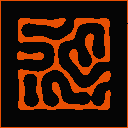

In [14]:
# Show the pattern at last.
img_pattern = Image.open(pjoin(dpath_images, "pattern_500000.png"))
img_pattern

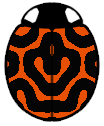

In [15]:
img_ladybird = Image.open(pjoin(dpath_images, "ladybird_500000.png"))
img_ladybird

In [16]:
# Model file
!ls {pjoin(dpath_output, "models")}

model_1.json


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x1de42066340>


In [17]:
fpath_model = pjoin(dpath_output, "models", "model_1.json")
with open(fpath_model, "rt") as fin:
    model_dict = json.load(fin)
    
model_dict

{'index': 0,
 'generation': None,
 'fitness': None,
 'Du': 0.0005,
 'Dv': 0.075,
 'ru': 0.18,
 'rv': 0.02874,
 'k': 0.084,
 'su': 0.001,
 'sv': 0.025,
 'mu': 0.08,
 'width': 128,
 'height': 128,
 'dx': 0.1,
 'thr_color': 0.5,
 'color_u': [5, 5, 5],
 'color_v': [231, 79, 3],
 'initializer': 'LiawInitializer',
 'u0': 2.0,
 'v0': 1.0,
 'n_init_pts': 25,
 'init_pts_0': [88, 119],
 'init_pts_1': [15, 62],
 'init_pts_2': [62, 108],
 'init_pts_3': [21, 35],
 'init_pts_4': [3, 8],
 'init_pts_5': [42, 90],
 'init_pts_6': [80, 3],
 'init_pts_7': [14, 14],
 'init_pts_8': [55, 21],
 'init_pts_9': [95, 27],
 'init_pts_10': [45, 8],
 'init_pts_11': [23, 127],
 'init_pts_12': [107, 51],
 'init_pts_13': [110, 66],
 'init_pts_14': [101, 59],
 'init_pts_15': [51, 126],
 'init_pts_16': [122, 34],
 'init_pts_17': [11, 64],
 'init_pts_18': [63, 88],
 'init_pts_19': [113, 5],
 'init_pts_20': [96, 56],
 'init_pts_21': [112, 41],
 'init_pts_22': [54, 106],
 'init_pts_23': [4, 29],
 'init_pts_24': [122, 64],
 

In [18]:
from lpf.visualization import merge_single_timeseries

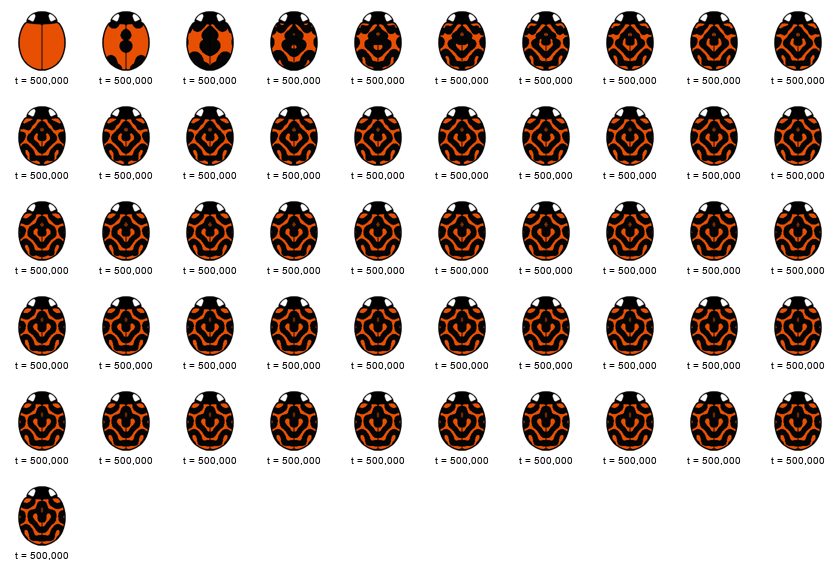

In [19]:
# Visualize the temporal evolution of ladybird by merging images.
img_ladybirds = merge_single_timeseries(dpath_input=dpath_images,
                                        n_cols=10,
                                        infile_header="ladybird",
                                        ratio_resize=0.5,
                                        text_format="t = ",
                                        font_size=10,
                                        text_margin_ratio=.1)
img_ladybirds

In [20]:
img_ladybirds.save(pjoin(dpath_output, "output_ladybird.png"))

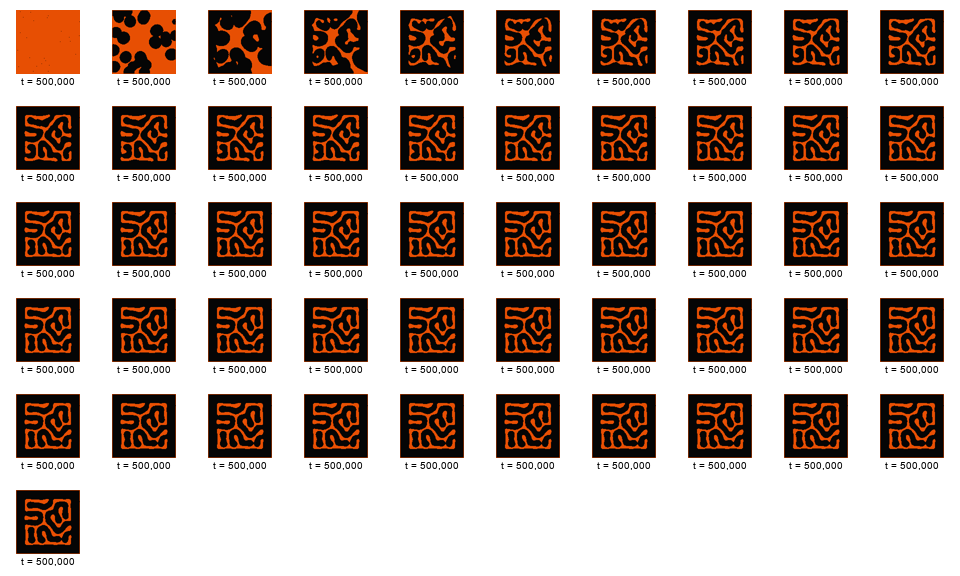

In [21]:
img_patterns = merge_single_timeseries(dpath_input=dpath_images,
                                       n_cols=10,
                                       infile_header="pattern",
                                       ratio_resize=0.5,
                                       text_format="t = ",
                                       font_size=10,
                                       text_margin_ratio=.1)
img_patterns

In [22]:
img_patterns.save(pjoin(dpath_output, "output_pattern.png"))

## Make a ladybug from parameters

From: tutorials/tutorial02_visualize_single_morph.ipynb

In [5]:
# import sys
# sys.path.append('/content/lpf_upper') #/lpf

In [7]:
# !pip show lpf

import sys
import pprint

pprint.pprint(sys.path)

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/lpf-0.0.1-py3.10.egg',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/lpf']


In [2]:
# %cd "/content/lpf"
# might not be necessary
import os
os.chdir('/content/lpf_upper')

%pwd
%ls "lpf/initializers"

# from lpf import initializers
from lpf.initializers import LiawInitializer


initializerfactory.py  __pycache__/
initializer.py         twocomponentconstantinitializer.py
__init__.py            twocomponentinitializer.py
liawinitializer.py


In [3]:
import os
import os.path as osp
from os.path import join as pjoin
import time
from datetime import datetime

import numpy as np
np.seterr(all='raise')

from lpf.initializers import LiawInitializer
from lpf.models import LiawModel
from lpf.solvers import EulerSolver, RungeKuttaSolver

In [34]:
batch_size = 1  # A single set of parameters
# TODO debug gpu option
device = "cpu"  # Device option: CPU or GPU

# Time parameters
dt = 0.01
n_iters = 10000 # 1000000

# Space parameters
dx = 0.1
width = 128
height = 128
shape = (height, width)

In [15]:
# Create the output directory.
str_now = datetime.now().strftime('%Y%m%d-%H%M%S')
dpath_output = pjoin(osp.abspath("./output"), "experiment_batch_%s" % (str_now))
os.makedirs(dpath_output, exist_ok=True)

In [16]:
# Create a dict for parameters.
param_dict =  {
 "u0": 1.9530066532565284,
 "v0": 2.3936837749803437,
 "Du": 0.000497858463742147,
 "Dv": 0.07796387325338522,
 "ru": 0.1829963268369453,
 "rv": 0.10001543043288767,
 "k": 0.15824185494975906,
 "su": 0.0004593283228100326,
 "sv": 0.021391505467616145,
 "mu": 0.09084717479481387
}

In [17]:
# In this example, we use 20 positions for initializing u with u0.
param_dict["init_pts_0"] = (20, 81)
param_dict["init_pts_1"] = (16, 27)
param_dict["init_pts_2"] = (85, 93)
param_dict["init_pts_3"] = (28, 39)
param_dict["init_pts_4"] = (119, 77)
param_dict["init_pts_5"] = (105, 39)
param_dict["init_pts_6"] = (68, 92)
param_dict["init_pts_7"] = (57, 46)
param_dict["init_pts_8"] = (53, 82)
param_dict["init_pts_9"] = (73, 78)
param_dict["init_pts_10"] = (25, 8)
param_dict["init_pts_11"] = (98, 23)
param_dict["init_pts_12"] = (74, 46)
param_dict["init_pts_13"] = (117, 45)
param_dict["init_pts_14"] = (58, 65)
param_dict["init_pts_15"] = (70, 75)
param_dict["init_pts_16"] = (71, 108)
param_dict["init_pts_17"] = (106, 36)
param_dict["init_pts_18"] = (125, 72)
param_dict["init_pts_19"] = (105, 84)

In [18]:
param_dict

{'u0': 1.9530066532565284,
 'v0': 2.3936837749803437,
 'Du': 0.000497858463742147,
 'Dv': 0.07796387325338522,
 'ru': 0.1829963268369453,
 'rv': 0.10001543043288767,
 'k': 0.15824185494975906,
 'su': 0.0004593283228100326,
 'sv': 0.021391505467616145,
 'mu': 0.09084717479481387,
 'init_pts_0': (20, 81),
 'init_pts_1': (16, 27),
 'init_pts_2': (85, 93),
 'init_pts_3': (28, 39),
 'init_pts_4': (119, 77),
 'init_pts_5': (105, 39),
 'init_pts_6': (68, 92),
 'init_pts_7': (57, 46),
 'init_pts_8': (53, 82),
 'init_pts_9': (73, 78),
 'init_pts_10': (25, 8),
 'init_pts_11': (98, 23),
 'init_pts_12': (74, 46),
 'init_pts_13': (117, 45),
 'init_pts_14': (58, 65),
 'init_pts_15': (70, 75),
 'init_pts_16': (71, 108),
 'init_pts_17': (106, 36),
 'init_pts_18': (125, 72),
 'init_pts_19': (105, 84)}

In [19]:
model_dicts = []
model_dicts.append(param_dict)

In [20]:
# Create the Liaw initializer.
initializer = LiawInitializer()
initializer.update(model_dicts)
params = LiawModel.parse_params(model_dicts)

In [25]:
# Create the Liaw model.
model = LiawModel(
    initializer=initializer,
    params=params,
    dx=dx,
    width=width,
    height=height,
    device=device
)

In [35]:
# Create the Euler solver.
solver = EulerSolver()

t_beg = time.time()

solver.solve(
    model=model,
    dt=dt,
    n_iters=n_iters,
    dpath_model=dpath_output,
    dpath_ladybird=dpath_output,
    dpath_pattern=dpath_output,
    verbose=0
)

t_end = time.time()

print("Elapsed time: %f sec." % (t_end - t_beg))

Elapsed time: 3.450543 sec.


In [36]:
arr_color = model.colorize(thr_color=0.5)
img_ladybird, img_pattern = model.create_image(0, arr_color)

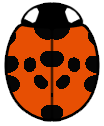

In [37]:
img_ladybird

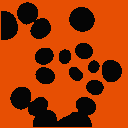

In [38]:
img_pattern

In [ ]:
model.save_image(index=0,
                 fpath_ladybird=pjoin(dpath_output, "ladybird.png"),
                 fpath_pattern=pjoin(dpath_output, "pattern.png"),
                 arr_color=arr_color)

In [ ]:
# !ls {dpath_output}

ladybird.png
model_1
models
pattern.png


sys:1: ResourceWarning: unclosed socket <zmq.Socket(zmq.PUSH) at 0x280f726afa0>
C:\Anaconda3\envs\lpf\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedWriter name=4>
  return process_handler(cmd, _system_body)
C:\Anaconda3\envs\lpf\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedReader name=5>
  return process_handler(cmd, _system_body)
C:\Anaconda3\envs\lpf\lib\site-packages\IPython\utils\_process_win32.py:145: ResourceWarning: unclosed file <_io.BufferedReader name=6>
  return process_handler(cmd, _system_body)
